In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.ioff()
# turn of warnings
import warnings
warnings.filterwarnings('ignore')


# Using an Unstructured Grid

For many applications, the random fields are needed on an unstructured grid.
Normally, such a grid would be read in, but we can simply generate one and
then create a random field at those coordinates.


In [2]:
import numpy as np
import gstools as gs

Creating our own unstructured grid



In [3]:
seed = gs.random.MasterRNG(20220425)
rng = np.random.RandomState(seed())
x = rng.randint(0, 100, size=10000)
y = rng.randint(0, 100, size=10000)

model = gs.Exponential(dim=2, var=1, len_scale=[12, 3], angles=np.pi / 8)
srf = gs.SRF(model, seed=20220425)
field = srf((x, y))
srf.vtk_export("field")

'C:\\Users\\kevbrown\\Documents\\GitHub\\gstools-transform22-tutorial\\02_random_field\\field.vtu'

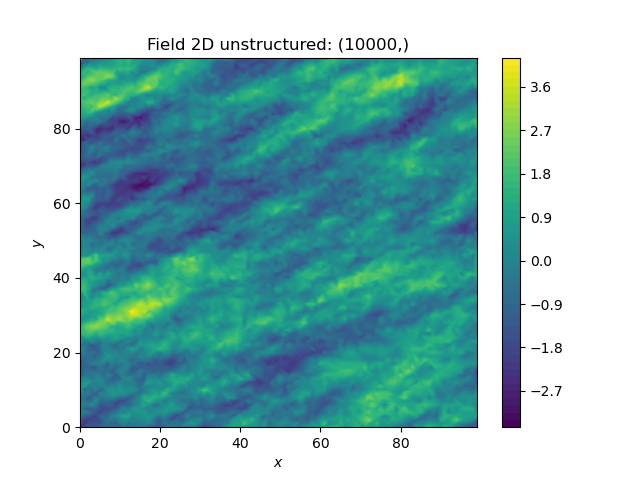

In [4]:
ax = srf.plot(contour_plot=True)
ax.set_aspect("equal")

Comparing this image to the previous one, you can see that be using the same
seed, the same field can be computed on different grids.



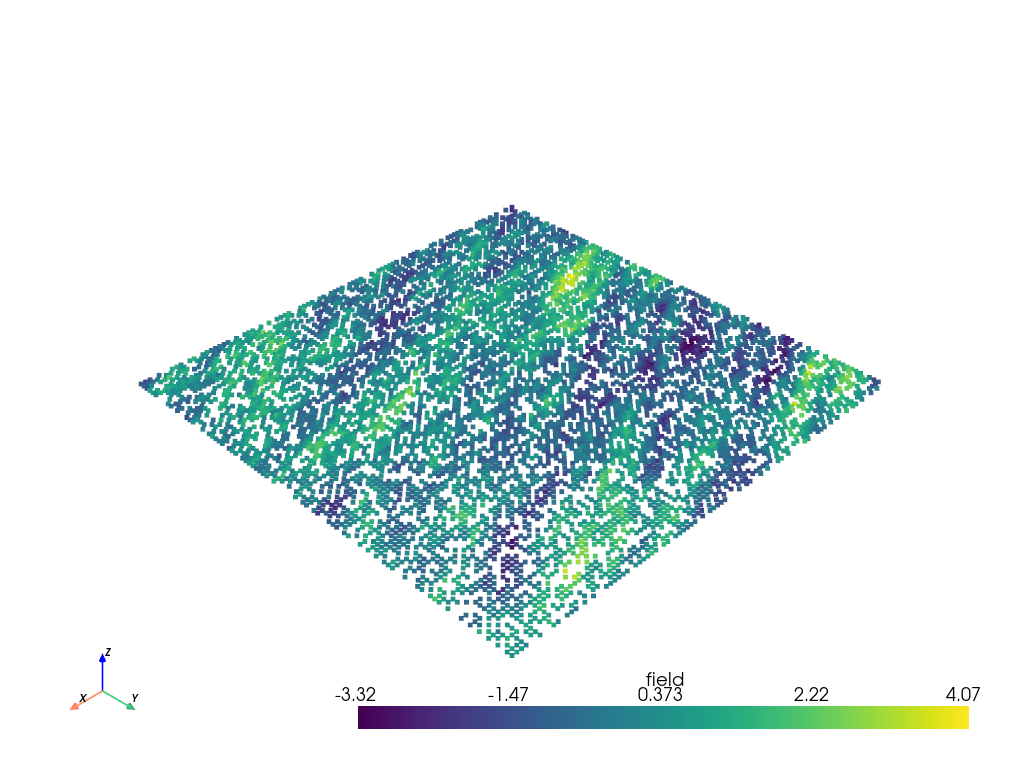

In [5]:
mesh = srf.to_pyvista()
mesh.plot()